In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

Original Image
--------------------------------------------------


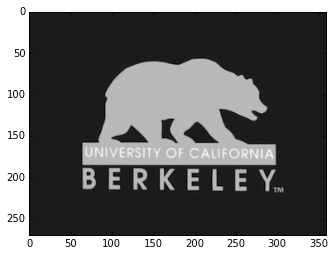

Censored Image
--------------------------------------------------


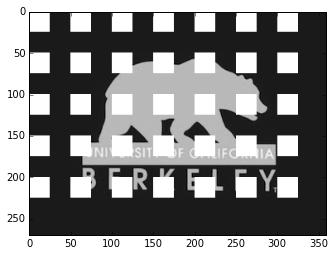

In [81]:
img = Image.open('/home/nate_black/Downloads/berkeley.jpg')
berkeley = np.array(img)

print "Original Image"
print "-" * 50
img = img.convert('LA')
plt.imshow(img, cmap='gray')
plt.show();

print "Censored Image"
print "-" * 50

mat = np.array(list(img.getdata(band=0)), float)
mat.shape = (img.size[1], img.size[0])
img_mat = np.matrix(mat)

#Add white to image
for i in xrange(0,250, 50):
    for j in xrange(0, 350, 50):
        img_mat[i:i+25,j:j+25] = 255
plt.imshow(img_mat, cmap='gray');

#Re-Create Image Using SVD

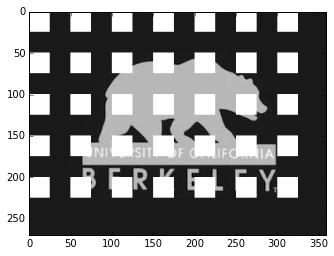

In [87]:
#Use SVD to recreate censored image
u, s, v = np.linalg.svd(img_mat, full_matrices=False)

# these are (nearly) the same, that's the decomposition!
plt.imshow(Image.fromarray(np.uint8(np.dot(np.dot(u, np.diag(s)), v))), cmap = 'gray');

#Keep Only 1 Element of S

We see the white spot (i.e. unrated jokes) are filled in but we aren't retaining much info from the original image

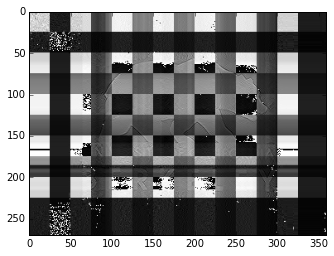

In [95]:
#Adjust S- keep 1 item and make the rest grayish
s_adj = s.copy()
s_adj = np.hstack([s[:1], np.zeros(269) + np.random.randint(0,255) ])

plt.imshow(Image.fromarray(np.uint8(np.dot(np.dot(u, np.diag(s_adj)), v))), cmap = 'gray');

#Try 10

We can see the original image better and still fill in many of the blanks

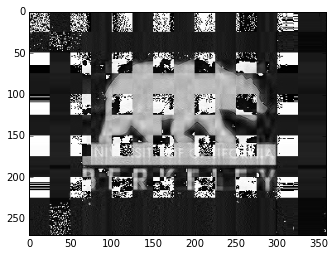

In [96]:
#Adjust S to fill in white spot
s_adj = s.copy()
s_adj = np.hstack([s[:10], np.zeros(260) +  np.random.randint(0,255) ])

plt.imshow(Image.fromarray(np.uint8(np.dot(np.dot(u, np.diag(s_adj)), v))), cmap = 'gray');

#Try 100

The original image is clearer

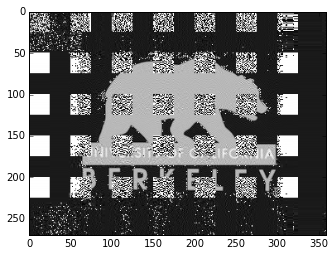

In [97]:
#Adjust S to fill in white spot
s_adj = s.copy()
s_adj = np.hstack([s[:100], np.zeros(170) + np.random.randint(0,255) ])

plt.imshow(Image.fromarray(np.uint8(np.dot(np.dot(u, np.diag(s_adj)), v))), cmap = 'gray');

#Try 200

Original is very clear but not much info for blank spots

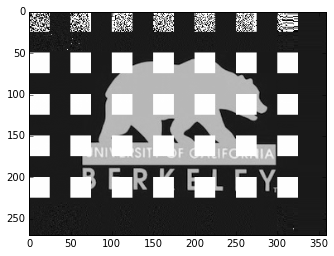

In [98]:
#Adjust S to fill in white spot
s_adj = s.copy()
s_adj = np.hstack([s[:200], np.zeros(70) +  np.random.randint(0,255) ])

plt.imshow(Image.fromarray(np.uint8(np.dot(np.dot(u, np.diag(s_adj)), v))), cmap = 'gray');